## Import Packages

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from drug_helper import *
import warnings
warnings.filterwarnings("ignore")

## Data

https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29#

The database was collected by Elaine Fehrman between March 2011 and March 2012.

The database contains records for 1885 respondents. For each respondent, 12 attributes are known: personality measurements -- NEO-FFI-R (neuroticism, extraversion, openness to experience, agreeableness, and conscientiousness), BIS-11 (impulsivity), and ImpSS (sensation seeking) -- level of education, age, gender, country of residence and ethnicity. In addition, participants were questioned concerning their use of 18 legal and illegal drugs (alcohol, amphetamines, amyl nitrite, benzodiazepines, cannabis, chocolate, cocaine, caffeine, crack, ecstasy, heroin, ketamine, legal highs, LSD, methadone, mushrooms, nicotine and volatile substance abuse and one fictitious drug (Semeron) which was introduced to identify over-claimers. For each drug, they selected ‘Never Used’, ‘Used over a Decade Ago’, ‘Used in Last Decade’, ‘Used in Last Year’, ‘Used in Last Month’, ‘Used in Last Week’, and ‘Used in Last Day’.

In [2]:
drug = pd.read_csv('drug_consumption.data', header=None, index_col=0)

In [3]:
#rename columns
drug.columns = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity',
               'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore',
               'Impulsive', 'SS', 'Alcohol', 'Amphet', 'Amyl', 'Benzos',
               'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy',
               'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
               'Nicotine', 'Semer', 'VSA']
drug

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
7,1.09449,-0.48246,1.16365,-0.57009,-0.31685,-0.46725,-1.09207,-0.45174,-0.30172,0.93949,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
8,0.49788,-0.48246,-1.73790,0.96082,-0.31685,-1.32828,1.93886,-0.84732,-0.30172,1.63088,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
9,0.49788,0.48246,-0.05921,0.24923,-0.31685,0.62967,2.57309,-0.97631,0.76096,1.13407,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


In [4]:
category_converter(drug)
drug

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,,,,,,,,,,,,,,,,,,,,,
1,35-44,Female,Professional certificate/ diploma,UK,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,25-34,Male,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,35-44,Male,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
4,18-24,Female,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
5,35-44,Female,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
6,65+,Female,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,1.63088,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
7,45-54,Male,Masters degree,USA,White,-0.46725,-1.09207,-0.45174,-0.30172,0.93949,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
8,35-44,Male,Left school at 16 years,UK,White,-1.32828,1.93886,-0.84732,-0.30172,1.63088,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
9,35-44,Female,Professional certificate/ diploma,Canada,White,0.62967,2.57309,-0.97631,0.76096,1.13407,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


### Personalities

NEO Five-Factor Inventory (NEO-FFI-R), highly reliable measure of basic personality domains. 60-item inventory
comprised of five personality domains or factors: N, E, O, A, and C with 12 items per domain. Read the 60 NEO-FFI-R statements and indicate on a five-point Likert scale how much a given item applied to them (i.e. 0 = ‘Strongly
Disagree’, 1 = ‘Disagree’, 2 = ‘Neutral’, 3 = ‘Agree’, to 4 = ‘Strongly Agree’). The score O and E domains of the NEO-FFI instrument are less reliable than N, A, and C.

1. Neuroticism (N):
    - long-term tendency to experience negative emotions such as nervousness, tension, anxiety and depression


2. Extraversion (E):
    - manifested in outgoing, warm, active, assertive, talkative, cheerful, and in search of stimulation characteristics


3. Openness to experience (O):
    - general appreciation for art, unusual ideas, and imaginative, creative, unconventional, and wide interests


4. Agreeableness (A):
    - dimension of interpersonal relations, characterized by altruism, trust, modesty, kindness, compassion and cooperativeness


5. Conscientiousness (C):
    - tendency to be organized and dependable, strong-willed, persistent, reliable, and efficient


Barratt Impulsiveness Scale (BIS-11), a 30-item self-report questionnaire that measures the behavioral construct of impulsiveness, and comprises three subscales: motor impulsiveness, attentional impulsiveness, and non-planning. The ‘motor’ aspect reflects acting without thinking, the ‘attentional’ component poor concentration and thought intrusions, and the ‘non-planning’ a lack of consideration for consequences. Items are scored on a four-point Likert scale. The higher BIS-11 scores, the higher the impulsivity level.


Impulsiveness Sensation-Seeking (ImpSS), combines the traits of impulsivity and sensation-seeking. 19 statements in true-false format, comprising eight items measuring impulsivity (Imp), and 11 items gauging sensation-seeking (SS).

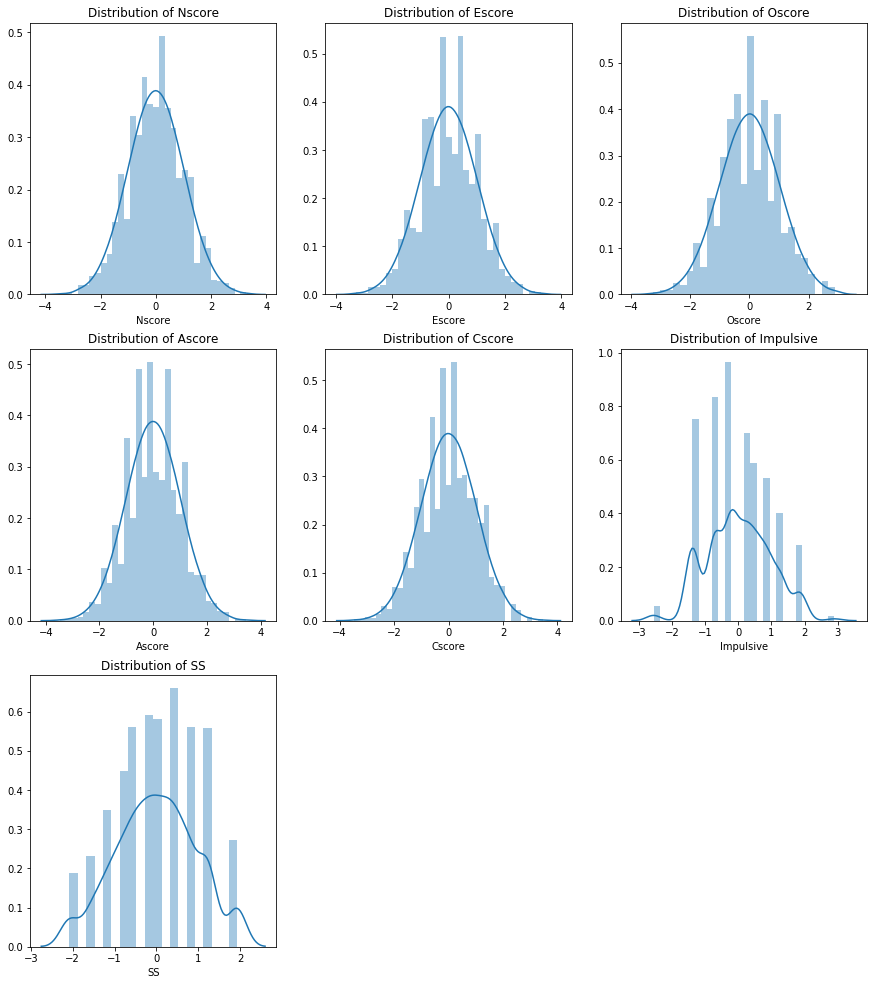

In [5]:
# define personality columns
personality_cols = ['Nscore', 'Escore', 'Oscore',
                    'Ascore', 'Cscore', 'Impulsive', 'SS']

# plot distributions of each personality type
fig, ax = plt.subplots(3, 3, figsize=(15, 17))
for i, col in enumerate(personality_cols):
    sns.distplot(drug[col], ax=ax[i//3, i%3])
    ax[i//3, i % 3].set_title(f"Distribution of {col}")
fig.delaxes(ax[2, 1])
fig.delaxes(ax[2, 2]);

### Drugs

In [6]:
# define drug columns
drug_cols = ['Alcohol', 'Amphet', 'Amyl', 'Benzos',
             'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy',
             'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
             'Nicotine', 'Semer', 'VSA']

# convert drug columns into numerical values
for col in drug_cols:
    le = LabelEncoder()
    drug[col] = le.fit_transform(drug[col])

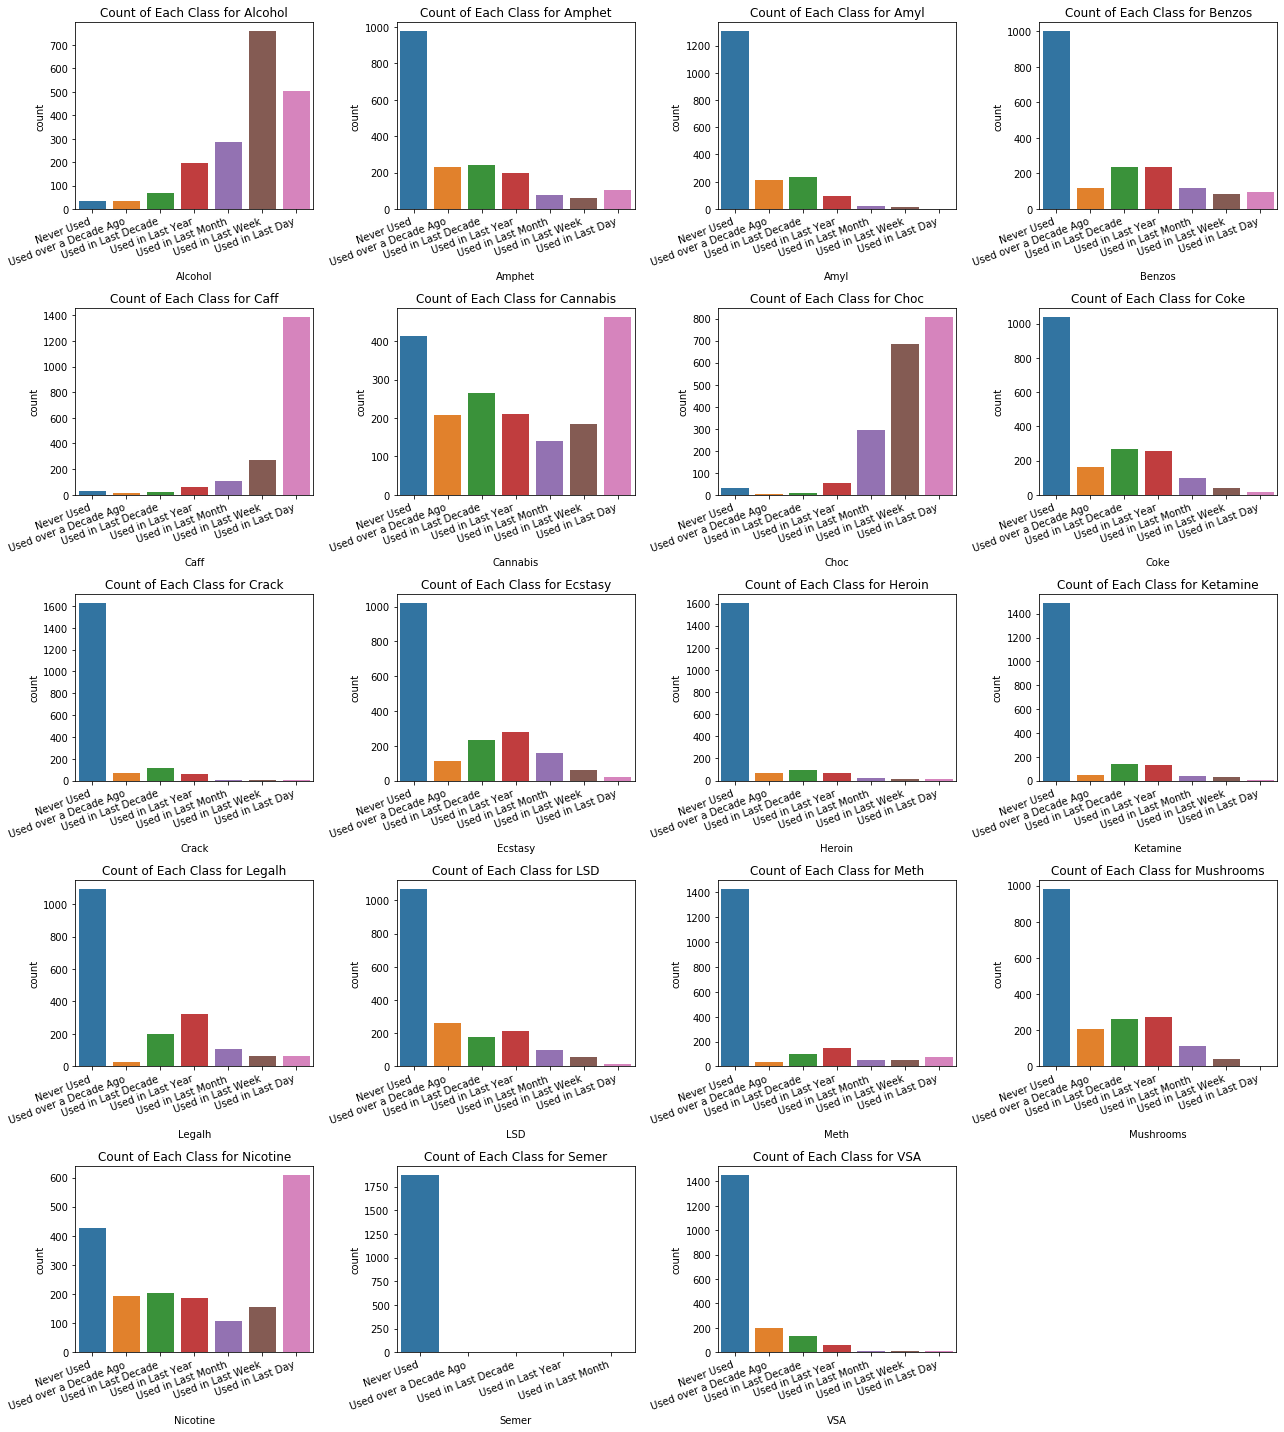

In [36]:
# define each class
classes = ['Never Used', 'Used over a Decade Ago', 'Used in Last Decade',
           'Used in Last Year', 'Used in Last Month', 'Used in Last Week', 'Used in Last Day']

# plot count of the classes for each drug
fig, ax = plt.subplots(5, 4, figsize=(18, 20))
for i, drugs in enumerate(drug_cols):
    sns.countplot(drug[drugs], ax=ax[i//4, i%4])
    ax[i//4, i%4].set_title(f"Count of Each Class for {drugs}")
    ax[i//4, i%4].set_xticklabels(classes, rotation=20, ha='right')
fig.delaxes(ax[4, 3])
plt.tight_layout();

In [33]:
# define user and non-user for each drug
for col in drug_cols:
    drug[f"{col}_User"] = [0 if (x == 0) | (x == 1) else 1
                         for x in drug[col]]

drug

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Crack_User,Ecstasy_User,Heroin_User,Ketamine_User,Legalh_User,LSD_User,Meth_User,Nicotine_User,Semer_User,VSA_User
0,,,,,,,,,,,,,,,,,,,,,
1,35-44,Female,Professional certificate/ diploma,UK,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0,0,0,0,0,0,0,1,0,0
2,25-34,Male,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,0,1,0,1,0,1,1,1,0,0
3,35-44,Male,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,0,0,0,0,0,0,0,0,0
4,18-24,Female,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0,0,0,1,0,0,0,1,0,0
5,35-44,Female,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,0,0,0,0,0,0,0,1,0,0
6,65+,Female,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,1.63088,...,0,0,0,0,0,0,0,1,0,0
7,45-54,Male,Masters degree,USA,White,-0.46725,-1.09207,-0.45174,-0.30172,0.93949,...,0,0,0,0,0,0,0,1,0,0
8,35-44,Male,Left school at 16 years,UK,White,-1.32828,1.93886,-0.84732,-0.30172,1.63088,...,0,0,0,0,0,0,0,0,0,0
9,35-44,Female,Professional certificate/ diploma,Canada,White,0.62967,2.57309,-0.97631,0.76096,1.13407,...,0,0,0,0,0,0,0,1,0,0


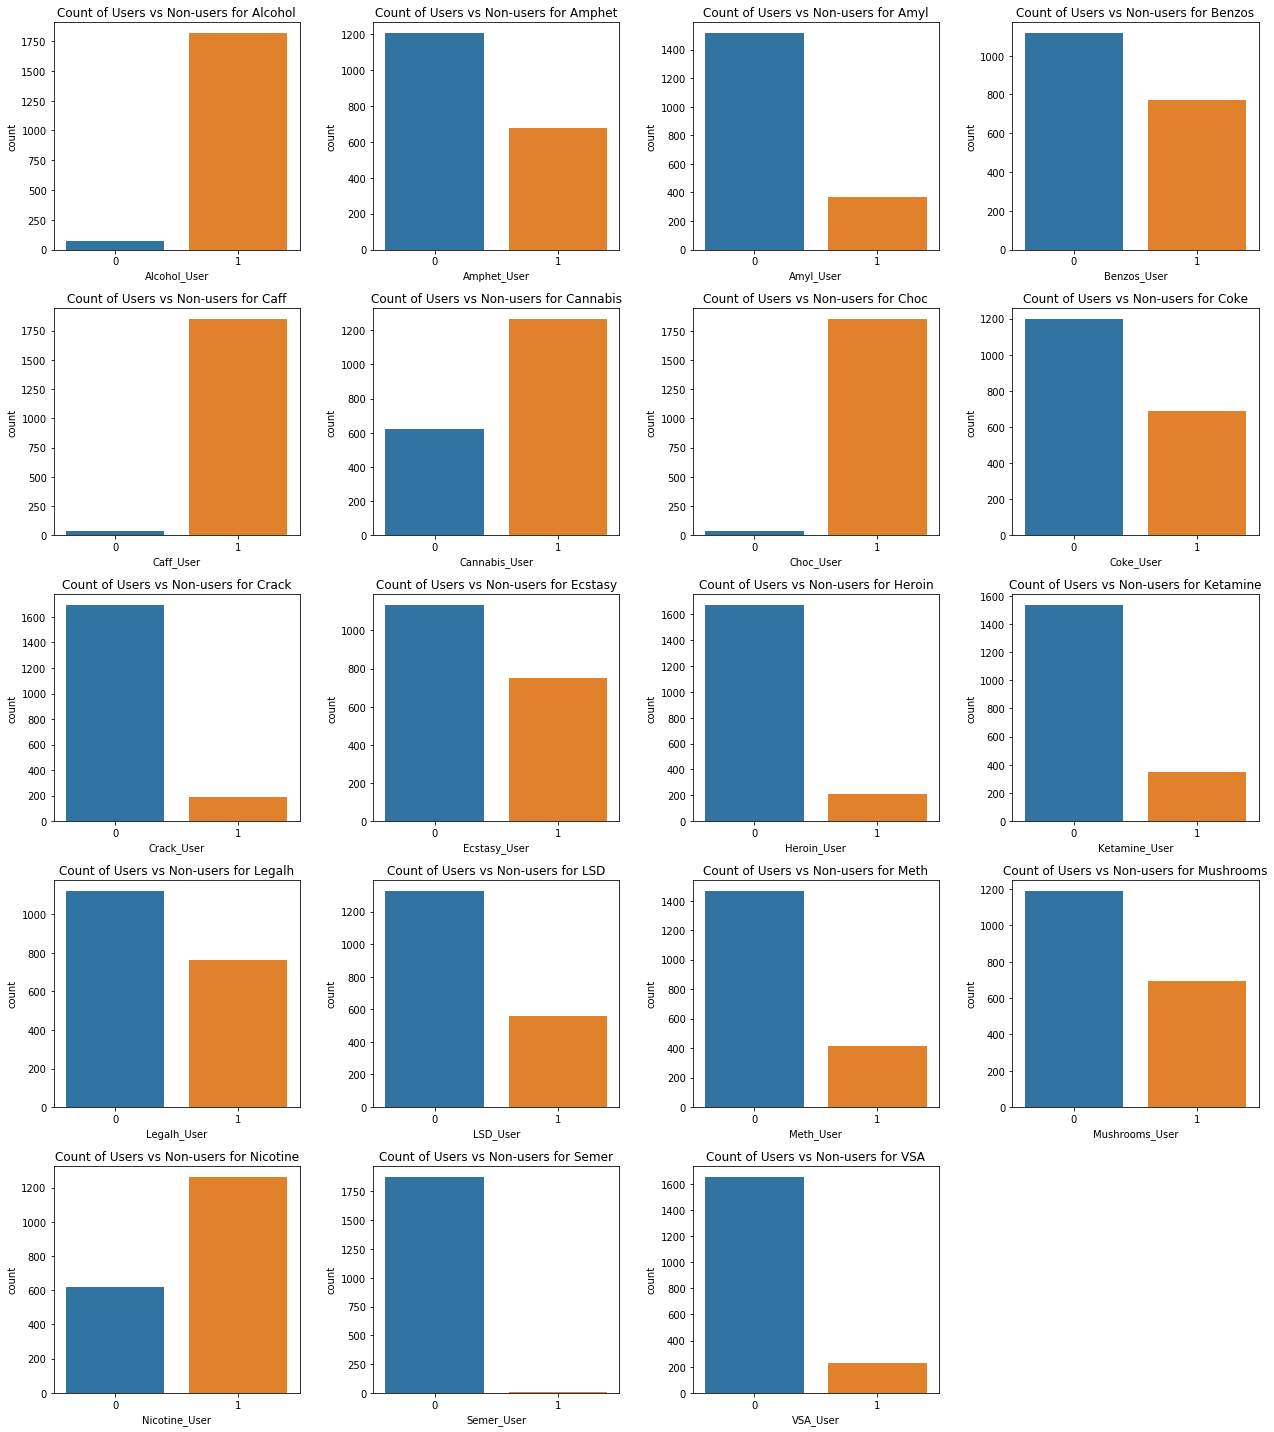

In [35]:
# plot count of users and non-users for each drug

fig, ax = plt.subplots(5, 4, figsize=(18, 20))
for i, drugs in enumerate(drug_cols):
    sns.countplot(drug[f"{drugs}_User"], ax=ax[i//4, i%4])
    ax[i//4, i%4].set_title(f"Count of Users vs Non-users for {drugs}")
fig.delaxes(ax[4, 3])
plt.tight_layout();

### Correlation between personalities and drugs

In [7]:
# calculate correlations between all features and each drug type
corrs = {}
for col in drug_cols:
    corr = drug[personality_cols + [col]].corr()[col][:-1].mean()
    corrs[col] = corr

# show highest mean of correlations for each drug
sorted(corrs.items(), key=lambda x: x[1], reverse=True)

[('Cannabis', 0.11981894870156087),
 ('Mushrooms', 0.11027705610944963),
 ('LSD', 0.10931051990228549),
 ('Ecstasy', 0.10889160389549908),
 ('Legalh', 0.09600537996059212),
 ('Coke', 0.08130745317752941),
 ('Amphet', 0.07808311002664091),
 ('Nicotine', 0.07352719984769261),
 ('Benzos', 0.06721361310447006),
 ('Ketamine', 0.06050946751917944),
 ('VSA', 0.05582439759060537),
 ('Heroin', 0.04428309582473332),
 ('Crack', 0.042309667806929144),
 ('Meth', 0.04101845802124276),
 ('Alcohol', 0.03650959014208671),
 ('Amyl', 0.033101520585518955),
 ('Caff', 0.021740251383820363),
 ('Semer', 0.019349634720174036),
 ('Choc', 0.001533789286234841)]

### Filter for Cannabis data

https://adf.org.au/drug-facts/cannabis/#wheel

**What is cannabis?**
Cannabis is classified as a cannabinoid drug.

**Other names**
Marijuana, yarndi, pot, weed, hash, dope, gunja, joint, stick, chronic, cone, choof, mull, 420, dabs, dabbing, BHO.

**How is it used?**
Cannabis can be smoked, eaten or vaporized and comes in different forms (marijuana, hashish, hash oil, concentrates). The effects of cannabis vary significantly depending on the form consumed.

Cannabis can be prepared into various foods generally called ‘edibles’. It takes between 1-3 hours to feel the effects after eating cannabis. Impatient or naïve users may believe they have not taken enough to feel the effects, and if they consume more they may find later that the psychoactive effects are unpleasantly strong. When edible products have inconsistent levels of THC, even experienced users may find it difficult to regulate the amount consumed. When smoked or vaporised, the effects are usually felt straight away. There are health concerns about the impact of smoking, especially in the long term, especially if mixed with tobacco.

Cannabis can also come in synthetic form, which may be more harmful than real cannabis.

**Effects of cannabis**
Cannabis affects every individual differently. Even the same person may have a different experience on separate occasions or over the course of their life. Some of the factors that influence these differences appear to be:

- size, weight and health
- whether the person is used to taking it
- whether other drugs are taken around the same time
- the amount taken
- the strength of the drug
- expectations of consuming cannabis
- the environment of the individual
- the individual’s personality

The effects of cannabis may be felt immediately if smoked, or within an hour or two if eaten, and effects may include:

- feelings of relaxation and euphoria
- spontaneous laughter and excitement
- increased sociability
- increased appetite
- dry mouth

If large amount, strong batch, or concentrated form is consumed, you may be more likely to also experience:

- memory impairment
- slower reflexes
- bloodshot eyes
- increased heart rate
- mild anxiety and paranoia

**Long-term effects**
Long-term effects are dependent on how much and how often the cannabis is consumed and may also be affected by how the cannabis is consumed (e.g. vaporising a concentrate versus smoking the flower). Heavy, regular use of cannabis may eventually cause:

- tolerance to the effects of cannabis
- dependence on cannabis
- reduced cognitive functioning

Smoking cannabis may increase the likelihood of experiencing:

- sore throat
- asthma
- bronchitis
- if smoked with tobacco, cancer

Those with a family history of mental illness are more likely to also experience anxiety, depression and psychotic symptoms after using cannabis. Psychotic symptoms include delusions, hallucinations and seeing or hearing things that do not exist or are distorted.

**Using cannabis with other drugs**
The effects of taking cannabis with other drugs − including over-the-counter or prescribed medications − can be unpredictable.

Cannabis + alcohol: nausea, vomiting

Cannabis is sometimes used to help with the ‘come down’ effects of stimulant drugs, such as ice, speed and ecstasy.

**Withdrawal**
Giving up cannabis after regular, heavy use over a long time is challenging, because the body has to get used to functioning without it. Withdrawal symptoms may last for only a week, but sleep may be affected for longer. Symptoms include:

- anxiety
- irritability
- loss of appetite and upset stomach
- sweating, chills and tremors
- restless sleep and nightmares

In [39]:
cannabis = drug[['Cannabis_User', 'Age', 'Gender', 'Education',
                 'Ethnicity'] + personality_cols]
cannabis

,Cannabis_User,Age,Gender,Education,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
0,,,,,,,,,,,,
1,0,35-44,Female,Professional certificate/ diploma,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084
2,1,25-34,Male,Doctorate degree,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575
3,1,35-44,Male,Professional certificate/ diploma,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148
4,1,18-24,Female,Masters degree,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084
5,1,35-44,Female,Doctorate degree,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575
6,0,65+,Female,Left school at 18 years,White,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858
7,0,45-54,Male,Masters degree,White,-0.46725,-1.09207,-0.45174,-0.30172,0.93949,-0.21712,0.07987
8,0,35-44,Male,Left school at 16 years,White,-1.32828,1.93886,-0.84732,-0.30172,1.63088,0.19268,-0.52593
9,0,35-44,Female,Professional certificate/ diploma,White,0.62967,2.57309,-0.97631,0.76096,1.13407,-1.37983,-1.54858


### Filter for Mushrooms data

In [40]:
mushrooms = drug[['Mushrooms_User', 'Age', 'Gender', 'Education',
                 'Ethnicity'] + personality_cols]
mushrooms

,Mushrooms_User,Age,Gender,Education,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
0,,,,,,,,,,,,
1,0,35-44,Female,Professional certificate/ diploma,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084
2,0,25-34,Male,Doctorate degree,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575
3,0,35-44,Male,Professional certificate/ diploma,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148
4,0,18-24,Female,Masters degree,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084
5,1,35-44,Female,Doctorate degree,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575
6,0,65+,Female,Left school at 18 years,White,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858
7,0,45-54,Male,Masters degree,White,-0.46725,-1.09207,-0.45174,-0.30172,0.93949,-0.21712,0.07987
8,0,35-44,Male,Left school at 16 years,White,-1.32828,1.93886,-0.84732,-0.30172,1.63088,0.19268,-0.52593
9,0,35-44,Female,Professional certificate/ diploma,White,0.62967,2.57309,-0.97631,0.76096,1.13407,-1.37983,-1.54858


## Preprocessing Data

### Ordinal Feature Quantification

In [49]:
# convert ordinal categorical columns into numerical values
for col in (['Age', 'Education'] + personality_cols):
    le = LabelEncoder()
    cannabis[col] = le.fit_transform(cannabis[col])

cannabis

,Cannabis_User,Age,Gender,Education,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
0,,,,,,,,,,,,
1,0,2,Female,6,Mixed-White/Asian,27,19,16,17,24,3,2
2,1,1,Male,0,White,17,35,29,28,23,2,5
3,1,2,Male,6,White,19,28,14,12,16,1,7
4,1,0,Female,5,White,22,17,20,27,28,1,2
5,1,2,Female,0,White,31,11,17,21,32,3,5
6,0,5,Female,3,White,17,21,9,35,34,1,1
7,0,3,Male,5,White,19,15,17,21,30,3,6
8,0,2,Male,1,White,12,35,14,21,34,4,4
9,0,2,Female,6,White,30,38,13,28,31,1,1


### Nominal Feature Quantification

In [50]:
# convert nominal categorical columns into numerical values
for col in ['Gender', 'Ethnicity']:
    cannabis = pd.get_dummies(cannabis)

cannabis

,Cannabis_User,Age,Education,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Gender_Female,Gender_Male,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Mixed-Black/Asian,Ethnicity_Mixed-White/Asian,Ethnicity_Mixed-White/Black,Ethnicity_Other,Ethnicity_White
0,,,,,,,,,,,,,,,,,,,
1,0,2,6,27,19,16,17,24,3,2,1,0,0,0,0,1,0,0,0
2,1,1,0,17,35,29,28,23,2,5,0,1,0,0,0,0,0,0,1
3,1,2,6,19,28,14,12,16,1,7,0,1,0,0,0,0,0,0,1
4,1,0,5,22,17,20,27,28,1,2,1,0,0,0,0,0,0,0,1
5,1,2,0,31,11,17,21,32,3,5,1,0,0,0,0,0,0,0,1
6,0,5,3,17,21,9,35,34,1,1,1,0,0,0,0,0,0,0,1
7,0,3,5,19,15,17,21,30,3,6,0,1,0,0,0,0,0,0,1
8,0,2,1,12,35,14,21,34,4,4,0,1,0,0,0,0,0,0,1
9,0,2,6,30,38,13,28,31,1,1,1,0,0,0,0,0,0,0,1


## Modeling

In [51]:
from sklearn.model_selection import train_test_split

y = cannabis['Cannabis_User']
X = cannabis.drop('Cannabis_User', axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=220)